SENDEX FORMULA = 2 X DEWPOINT + HUMIDITY - MINTEMP 

The Lower the number, the better the conditions. A Sendex of 100 is just about perfect as a general rule for rock climbing in the Red River Gorge.

In [27]:
import requests
from pprint import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
response = requests.get('https://api.open-meteo.com/v1/forecast?latitude=37.80&longitude=-83.70&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m&daily=temperature_2m_min&current_weather=true&temperature_unit=fahrenheit&windspeed_unit=mph&timezone=America%2FNew_York&past_days=92')
main_info = response.json()

In [29]:
sendex_table = pd.DataFrame(columns= ['Date', 'Minimum Temperature','Dewpoint Average', 'Humidity Average'])
sendex_table

,Date,Minimum Temperature,Dewpoint Average,Humidity Average


In [30]:
daily_data = main_info['daily']
hourly_data = main_info['hourly']

for i in range(len(daily_data['time'])):
    date = daily_data['time'][i]
    min_temp = daily_data['temperature_2m_min'][i]
    dewpoint = np.mean(hourly_data['dewpoint_2m'][i*24:i*24 + 24])
    humidity = np.mean(hourly_data['relativehumidity_2m'][i*24:i*24 + 24])
    
    sendex_table = sendex_table.append({'Date': date, 'Minimum Temperature': min_temp, 'Dewpoint Average': dewpoint, 'Humidity Average': humidity},ignore_index=True)
    
sendex_table

/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_40764/2378166137.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sendex_table = sendex_table.append({'Date': date, 'Minimum Temperature': min_temp, 'Dewpoint Average': dewpoint, 'Humidity Average': humidity},ignore_index=True)
/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_40764/2378166137.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sendex_table = sendex_table.append({'Date': date, 'Minimum Temperature': min_temp, 'Dewpoint Average': dewpoint, 'Humidity Average': humidity},ignore_index=True)
/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_40764/2378166137.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sendex_table = sendex_

,Date,Minimum Temperature,Dewpoint Average,Humidity Average
0,2022-11-12,32.3,37.866667,90.750000
1,2022-11-13,31.7,27.183333,78.416667
2,2022-11-14,29.8,27.054167,70.291667
3,2022-11-15,34.8,35.725000,88.500000
4,2022-11-16,33.7,29.895833,75.875000
...,...,...,...,...
94,2023-02-14,33.2,31.075000,62.541667
95,2023-02-15,54.4,45.404167,71.541667
96,2023-02-16,49.7,52.779167,87.583333
97,2023-02-17,25.0,21.537500,61.625000


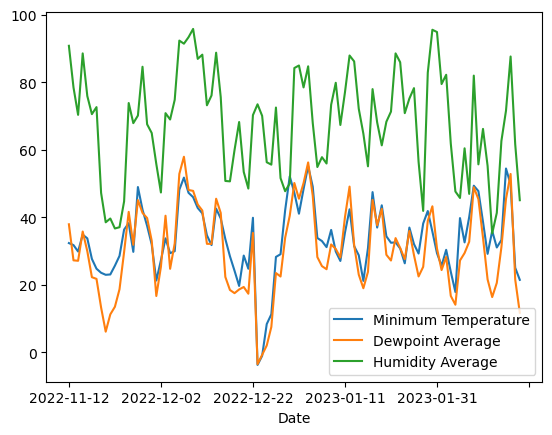

In [31]:
fig, ax = plt.subplots()
sendex_table.plot(x='Date', y='Minimum Temperature', kind='line', ax=ax)
sendex_table.plot(x='Date', y='Dewpoint Average', kind='line', ax=ax)
sendex_table.plot(x='Date', y='Humidity Average', kind='line', ax=ax)
plt.show()
